In [1]:
import os
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import requests

In [2]:
# Directory containing the files for each food type
food_directory = "C:\\Users\\parkd\\Desktop\\Final Year Project\\food-101\\images"

# Get a list of all files in the directory
files = os.listdir(food_directory)

# Extract the file names without the file extension
food_list = [os.path.splitext(file)[0] for file in files]

In [3]:
def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.                                      

    pred = model.predict(img)
    index = np.argmax(pred)
    food_list.sort()
    pred_value = food_list[index]
    
    if show:
         plt.imshow(img[0])                           
         plt.axis('off')
         plt.title(pred_value)
         plt.show()


In [4]:
# Set the path to the food-101 directory
food_101_path = r'C:\Users\parkd\Desktop\Final Year Project'

# Change the current working directory to food-101
os.chdir(food_101_path)
os.getcwd()

'C:\\Users\\parkd\\Desktop\\Final Year Project'

In [5]:
model = load_model('model.hdf5')

In [6]:
images = []
images.append('churros.jpg')
images.append('french_onion_soup.jpg')
images.append('omelette.jpg')
images.append('tacos.jpg')

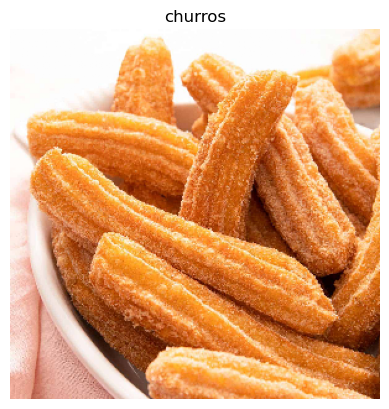

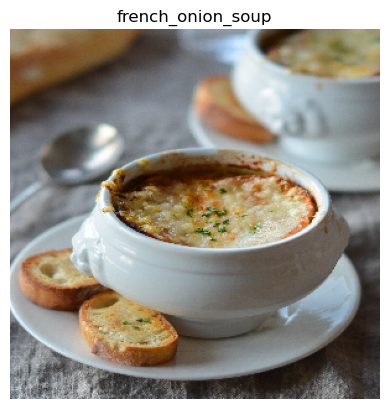

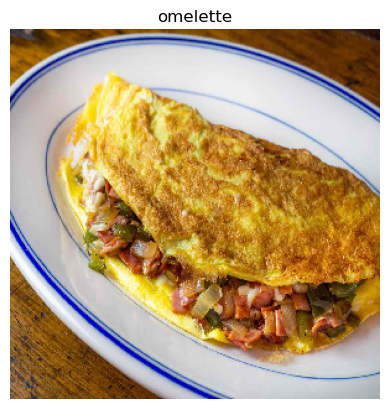

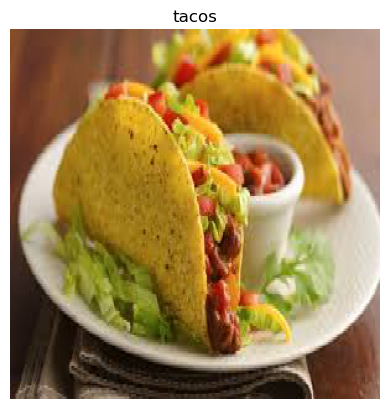

In [7]:
predict_class(model, images, True)

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [9]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\parkd\AppData\Local\Temp\tmpbnan1bxp\assets
